In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted 
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

Ma'lumotlar to'plamini `pandas` modulidagi `DataFrame` obyektiga o'qib olamiz

In [2]:
df = pd.read_csv('C:\\zomato.csv')

# **Ma'lumotlar to'plamini tushunish**

Ma'lumotlar to'plamimizda qanday ustunlar va qanday qiymatlar borligini ko'zdan kechirish uchun uning dastlabki 5 ta qatorini chiqaramiz

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


**Ma'lumotlar to'plamimiz qanday o'lchamga ega ekanligini aniqlaymiz**

In [4]:
df.shape

(51717, 17)

**Endi `info()` metodi orqali umumiyroq tushunchalar olishga harakat qilamiz**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

**Haqiqiy va butun sonlardan iborat ustunlar haqida statistik ma'lumotlar olishga harakat qilamiz**

In [6]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


>Yuqorida faqatgina `votes` ustuni haqida ma'lumotlarni oldik. Sababi, faqatgina shu ustundagi qiymatlar butun son turida yozilgan. Keyinchalik boshqa kerakli ustunlarni haqiqiy yoki butun son turiga o'tkazib, ular haqida ham statistik ma'lumotlar olamiz

# **Ma'lumotlarni tozalash**

Ushbu qadamda ma'lumotlarni bir nechta bosqichda training uchun tayyorlaymiz

* ### **NaN qiymatlar**

Ma'lumotlar to'plamimizdagi tushirib qoldirilgan qiymatlarning sonini har bir ustun bo'yicha hisoblaymiz

In [7]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

**To'plamimizning `dish_liked` ustunidan to'liqligicha voz kechamiz, chunki undagi ma'lumotlarning 50% dan ko'p qismi tushirib qoldirilgan.**

In [8]:
del df['dish_liked']

`phone`, `location`, `rest_type`, `cuisines`, `approx_cost(for two people)` ustunlaridagi yetishmayotgan qiymatlarni esa tashlab yuborganimiz ma'qul. Chunki, bizda 51700 dan oshiq ma'lumotlar bor, bu yo'qotishlar esa ma'lumotlar to'plamimizning o'lchamini keskin kamaytirib yubormaydi

In [9]:
df.dropna(subset=['phone', 'location', 'rest_type', 'cuisines', 'approx_cost(for two people)'], inplace=True)

Yetishmayotgan qiymatlar saqlanib qolgan faqatgina `rate` ustunigina qoldi. Ushbu ustundagi qiymatlarni birdaniga tashlab yubormaymiz. Keling uni boshqacharoq usulda hal qilishga urinib ko'ramiz.

In [10]:
null_rate_idx = df[(df['rate'].isnull()) & (df['votes']==0)].index

In [11]:
for i in null_rate_idx:
    df.loc[i, 'rate'] = 0

Qolgan barcha yetishmayotgan qiymatlarga ega qatorlarni esa tashlab yuborishimiz mumkin

In [12]:
df.dropna(inplace=True)

* ### **Qiymatlarni normallashtirish va standartlashtirish**

Keling endi har bir ustunda notabiiy qiymatlar bor yoki yo'qligini aniqlashtirib olamiz. Undan avval esa bizda nimalar qolganini ko'rishimiz mumkin

In [13]:
 df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


**`online_order` ustunidagi qiymatlarni tekshiramiz**

In [14]:
df['online_order'].unique()

array(['Yes', 'No'], dtype=object)

**`book_table` ustunidagi qiymatlarni tekshiramiz**

In [15]:
df['book_table'].unique()

array(['Yes', 'No'], dtype=object)

**`rate` ustunidagi qiymatlarni tekshiramiz**

In [16]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', 0, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Ushbu ustundagi qiymatlar bu ko'rinishida biz uchun foydasiz. Qiymatlarni maksimal ballga bo'lish orqali foiz yoki koeffitsient ko'rinishida ifodalab olganimiz ma'qul. Masalan `4.1/5 = 0.82 = 82%` 

In [17]:
def adjust_rate(rate):
    try:
        given_rate, max_rate = rate.split('/')
        rate = round((float(given_rate) / float(max_rate)), 2)
        return rate
    except:
        return 0

In [18]:
df['rate'] = df['rate'].map(adjust_rate)

**`votes` ustunidagi qiymatlarni tekshiramiz**

In [19]:
df['votes'].describe()

count    50238.000000
mean       286.753772
std        811.747448
min          0.000000
25%          7.000000
50%         42.000000
75%        201.000000
max      16832.000000
Name: votes, dtype: float64

**`location` ustunidagi qiymatlarni tekshiramiz**

In [20]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'HSR', 'Marathahalli',
       'Wilson Garden', 'Shanti Nagar', 'Koramangala 5th Block',
       'Koramangala 8th Block', 'Richmond Road', 'Koramangala 7th Block',
       'Jalahalli', 'Koramangala 4th Block', 'Bellandur', 'Sarjapur Road',
       'Whitefield', 'East Bangalore', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'Frazer Town', 'RT Nagar', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan Bhima Nagar', 'Old 

**`rest_type` ustunidagi qiymatlarni tekshiramiz**

In [21]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

**`cuisines` ustunidagi qiymatlarni tekshiramiz**

In [22]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

Ushbu qiymatlar restoranlarda qaysi mamlakatlar taomlari tayyorlanishi haqidagi ma'lumotlarni o'zida jamlagan ekan. Bu qiymatlardan foydalanib, restoranda necha xil mamlakat taomlari tayyorlanishi haqidagi ma'lumotlarni olib, uni yangi `number_of_cuisines` ustuniga saqlaymiz

In [23]:
def get_cuisines_length(cuisines):
    try:
        cuisines_array = cuisines.split(',')
        return len(cuisines_array)
    except:
        return np.nan

In [24]:
df['number_of_cuisines'] = df['cuisines'].map(get_cuisines_length)

**`approx_cost(for two people)` ustunidagi qiymatlarni tekshiramiz**

In [25]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

Qiymatlar `object` turida va raqamlar orasida verguldan foydalanib yozilganini ko'rishimiz mumkin. Biz raqamlar orasidagi vergullarni yo'qotishimiz kerak va qiymatlarni ham `haqiqiy son` son turiga o'tkazamiz

In [26]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].map(lambda x: float(x.replace(',', '')))

Bu qiymatlar ikki kishi uchun taxminiy ovqatlanish o'rtacha narxi qancha bo'lishi mumkinligini anglatadi. Biz esa bir kishi uchun narx qancha bo'lishi mumkinligini hisoblab, ustun nomini ham `approx_cost` ga almashtiramiz.

In [27]:
df['approx_cost'] = df['approx_cost(for two people)'].map(lambda x: round(x / 2, 2))

In [28]:
del df['approx_cost(for two people)']

Qiymatlar butun son turiga o'tgach, qiymatlar haqida statistik ma'lumotlar olishimiz mumkin.

In [29]:
df['approx_cost'].describe()

count    50238.000000
mean       279.065896
std        220.502232
min         20.000000
25%        150.000000
50%        200.000000
75%        350.000000
max       3000.000000
Name: approx_cost, dtype: float64

**`menu_item` ustunidagi qiymatlarni tekshiramiz**

In [30]:
df['menu_item'].unique()

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

Ushbu ustunda restoranlarda mavjud taomlarning ro'yxatlari saqlanganligini ko'rishimiz mumkin. Ushbu ustun shu holatda biz uchun foydasiz, lekin ushbu ustundan foydalanib, menudagi taomlarning sonini o'zida saqlaydigan ustunni yaratib olishimiz mumkin.

In [31]:
def get_item_lengths(string):
    items = eval(string)
    return len(items)

In [32]:
df['number_of_menu_items'] = df['menu_item'].map(get_item_lengths)

Endi esa hosil bo'lgan yangi ustun haqida ma'lumotlar olishimiz mumkin

In [33]:
df['number_of_menu_items'].describe()

count    50238.000000
mean        25.656575
std         60.994374
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        717.000000
Name: number_of_menu_items, dtype: float64

**`listed_in(type)` ustunidagi qiymatlarni tekshiramiz**

In [34]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

**Keling ushbu ustun nomini ham oddiygina `type` ga o'zgartiramiz**

In [35]:
df.rename(columns = {'listed_in(type)': 'type'}, inplace=True)

**`listed_in(city)` ustunidagi qiymatlarni tekshiramiz**

In [36]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

Bu ustunning nomini ham `listed_in(city)` dan shunchaki `city`ga almashtirishimiz mumkin

In [37]:
df.rename(columns = {'listed_in(city)': 'city'}, inplace=True)

* ### **Dublikat qiymatlar**

Qatorlarda takroriy yozilganlari mavjudligini tekshiramiz.

In [38]:
df.duplicated().sum()

0

* ### **Ma'lumotlarni saralash**

Restoranlarni ularga berilgan ovozlar soni va baholashlarga ko'ra saralaymi. Ko'proq ovoz berilgan va yuqoriroq baholanganlar yuqoriroqda

In [39]:
df.sort_values(by=['rate', 'votes'], ascending=False, inplace=True)

* ### **Ma'lumotlarni qayta indekslash**

In [40]:
df.index = np.arange(1, len(df) + 1)

# **Ma'lumotlarni vizuallashtirish**

Ma'lumotlarni vizul ko'rinishda ifodalashdan avval, keling yuqoridagi bosqichlardan so'ng bizda qanday ma'lumotlar qolganligini ko'zdan kechirib olamiz

In [41]:
df.sample(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,reviews_list,menu_item,type,city,number_of_cuisines,approx_cost,number_of_menu_items
8033,https://www.zomato.com/bangalore/sri-ganesh-ju...,"537, 1st Main, Near Bethani School, 8th Block,...",Sri Ganesh Juice Junction,Yes,No,0.82,210,+91 9591274301,Koramangala 8th Block,Beverage Shop,"Beverages, Juices, Fast Food","[('Rated 5.0', 'RATED\n Delicious sandwiches ...","['PBC Juice', 'Chocolate Beverage Milkshake', ...",Delivery,Brigade Road,3,75.0,147
23070,https://www.zomato.com/bangalore/mayur-hosur-r...,"321/3A, Sharif Complex, Hosur Main Road, Oppos...",Mayur,Yes,Yes,0.74,20,+91 9676181454,Hosur Road,Casual Dining,"North Indian, South Indian, Chinese","[('Rated 5.0', 'RATED\n Newer property and ex...",[],Delivery,BTM,3,250.0,0
7148,https://www.zomato.com/bangalore/pecos-brigade...,"34, Resthouse Road, Brigade Road, Bangalore",Pecos Classic,No,Yes,0.82,558,080 41640022\n+91 7259166661,Brigade Road,"Pub, Casual Dining",Finger Food,"[('Rated 4.0', ""RATED\n This place was a tota...",[],Pubs and bars,MG Road,1,550.0,0
11304,https://www.zomato.com/bangalore/veg-rasoi-hsr...,"Building 2686, 31 Main, 13 Cross, Sector 1, Be...",Veg Rasoi,Yes,No,0.80,101,+91 6361605215,HSR,Delivery,"North Indian, Rajasthani","[('Rated 5.0', 'RATED\n Ordered today daal ba...",[],Delivery,Sarjapur Road,2,300.0,0
46455,https://www.zomato.com/bangalore/deepam-tiffin...,"4/1, 2nd Cross Road, 1st Stage, BTM Layout, Be...",Deepam Tiffins,No,No,0.00,0,+91 7003050054\r\n+91 9748122867,BTM,Quick Bites,"South Indian, North Indian, Chinese","[('Rated 5.0', 'RATED\n \nGood'), ('Rated 5.0'...",[],Delivery,Koramangala 5th Block,3,150.0,0


**Endi ma'lumotlarni vizuallashtirish orqali restoranlar haqidagi ayrim savollarga javob berishga va qiymatlar haqida yanada kengroq tushunchalar olishga harakat qilamiz**

* **Mijozlarning baholashlariga ko'ra qaysi restoranlar TOP10 da joylashgan?**

* **Qaysi 10 ta restoranlar mijozlar tomonidan eng past baholangan? Ovoz berilmagan va baholanmagan restoranlarni inobatga olmaymiz**

* **Restonlarning qancha qismida buyurtmalarni onlayn qabul qilish, qancha qismida onlayn stol band qilish  va qancha qismida ikkala xizmat ham mavjud?**

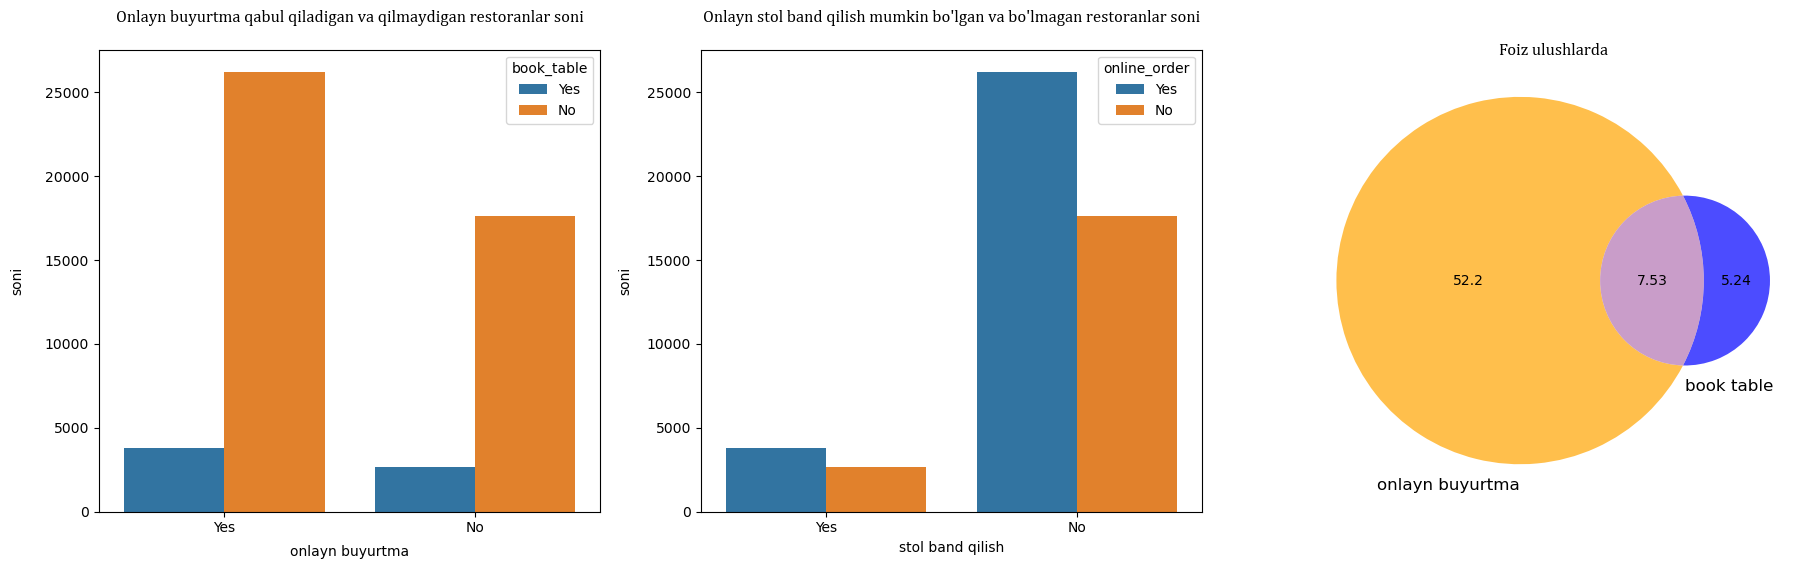

In [42]:
plt.figure(figsize=(22, 6))

plt.subplot(1, 3, 1)

plt.title('Onlayn buyurtma qabul qiladigan va qilmaydigan restoranlar soni', 
          fontdict={'size': '12', 'font': 'Cambria'},
          pad=20)
sns.countplot(data=df, x='online_order', hue='book_table')
plt.xlabel('onlayn buyurtma', labelpad=7)
plt.ylabel('soni', labelpad=15)



plt.subplot(1, 3, 2)
plt.title("Onlayn stol band qilish mumkin bo'lgan va bo'lmagan restoranlar soni", 
          fontdict={'size': '12', 'font': 'Cambria'},
          pad=20)
sns.countplot(data=df, x='book_table', hue='online_order')
plt.xlabel('stol band qilish')
plt.ylabel('soni', labelpad=10)



only_online_order = round(len(df[(df['online_order'] == 'Yes') & (df['book_table'] == 'No')]) / len(df) * 100, 2)
only_book_table = round(len(df[(df['book_table'] == 'Yes') & (df['online_order'] == 'No')]) / len(df) * 100, 2)
both_services = round(len(df[(df['book_table'] == 'Yes') & (df['online_order'] == 'Yes')]) / len(df) * 100, 2)

plt.subplot(1, 3, 3)
plt.title('Foiz ulushlarda', fontdict={'size': '12', 'font': 'Cambria'})
venn2(subsets=(only_online_order, only_book_table, both_services),  
      set_labels=('onlayn buyurtma', 'book table'), 
      set_colors=("orange", "blue"), alpha=0.7) 

plt.show()

* **Restoranlar eng ko'p joylashgan TOP10 manzillar qaysi?**

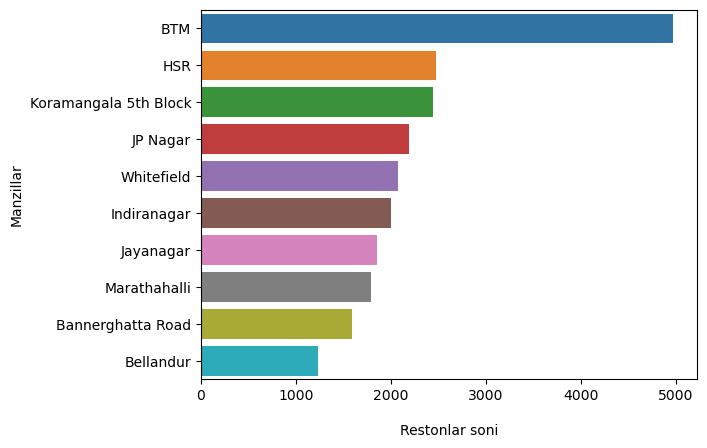

In [43]:
data = pd.DataFrame(df['location'].value_counts()[:10])

sns.barplot(x=data['count'], y=data.index)
plt.xlabel('Restonlar soni', labelpad=15)
plt.ylabel('Manzillar')

plt.show()

* **Bizda mavjud ovqatlanish narxlari qanday taqsimlangan?**

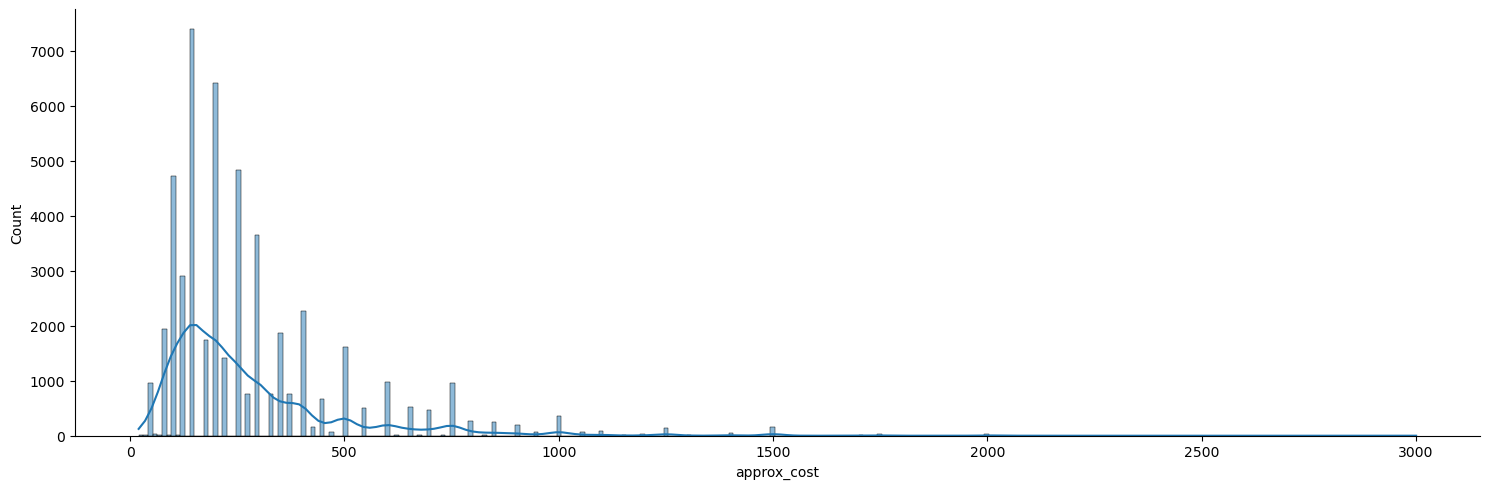

In [44]:
sns.displot(data=df, x='approx_cost', kde=True, height=5, aspect=3)

plt.show()

# **Keraksiz ustunlar**

Xo'sh bizda qanday ma'lumotlar borligiga yana bir bor umumiy nazar tashlaymiz

In [45]:
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,reviews_list,menu_item,type,city,number_of_cuisines,approx_cost,number_of_menu_items
1,https://www.zomato.com/bangalore/byg-brewski-b...,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,0.98,16832,+91 8039514766,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...","[('Rated 5.0', ""RATED\n This is an absolute g...",[],Delivery,Sarjapur Road,5,800.0,0
2,https://www.zomato.com/bangalore/byg-brewski-b...,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,0.98,16832,+91 8039514766,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...","[('Rated 4.0', 'RATED\n Visiting a microbrewe...",[],Dine-out,Sarjapur Road,5,800.0,0
3,https://www.zomato.com/bangalore/byg-brewski-b...,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,0.98,16832,+91 8039514766,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...","[('Rated 4.0', 'RATED\n Visiting a microbrewe...",[],Drinks & nightlife,Sarjapur Road,5,800.0,0


Ayrim ustunlarimiz keyingi jarayonlarda umuman kerak bo'lmaydi. Agar imkoni bo'lsa ulardagi qiymatlardan foydalanib, ulardan xulosalar chiqarib, yangi ustunlar yaratishga harakat qilamiz va ularning o'zlarini tashlab yuboramiz.

In [46]:
df.drop(['url', 'address', 'name', 'phone', 'cuisines', 'reviews_list', 'menu_item'], axis=1, inplace=True)

* ### **Dublikatlarni aniqlash**

To'g'ri biz avval ham takroriy qiymatlar bor yoki yo'q ekanligini aniqlagandik, ammo keraksiz ustunlar o'chirilgach, ayrim qatorlar xuddi takroriy yozilganga o'xshab qo'lishi mumkin

In [47]:
df.duplicated().sum()

1642

Takroriy bo'lib qolgan qatorlarni tashlab yuboramiz.

In [48]:
df.drop_duplicates(inplace=True)

# **Korrelatsiya tahlili**

Categorical va numerical qiymatlar uchun korrelatsiyani aniqlash turlicha kechadi. Shuning uchun biz ma'lumotlarimizni ikki qismga ajratamiz. Birinchisi faqat categorical, ikkinchisi esa faqat raqamli ustunlarni o'z ichiga oladi.

In [49]:
df_cat = df[['online_order', 'book_table', 'location', 'rest_type', 'type', 'city']]

In [50]:
df_num = df[['rate', 'votes', 'approx_cost', 'number_of_cuisines', 'number_of_menu_items']]

* ### **Raqamli qiymatlar uchun korrelatsiya**

In [51]:
df_num.corrwith(df_num['approx_cost']).sort_values(ascending=False)

approx_cost             1.000000
votes                   0.376577
rate                    0.295518
number_of_cuisines      0.260442
number_of_menu_items    0.010357
dtype: float64

**Keling bu korrelatsiya tahlilini `correlation matrix` orqali vizuallashtiramiz**

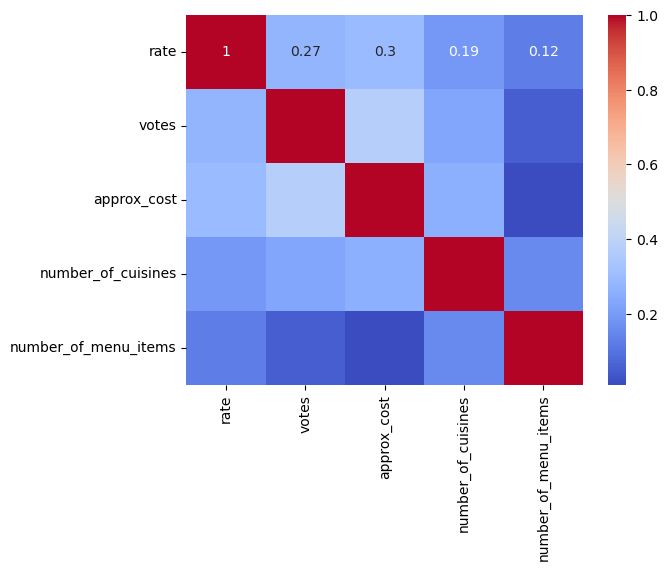

In [52]:
corr_matrix = df_num.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

**`pairplot` funksiyasi orqali ham bog'liqlikni kuzatish mumkin**

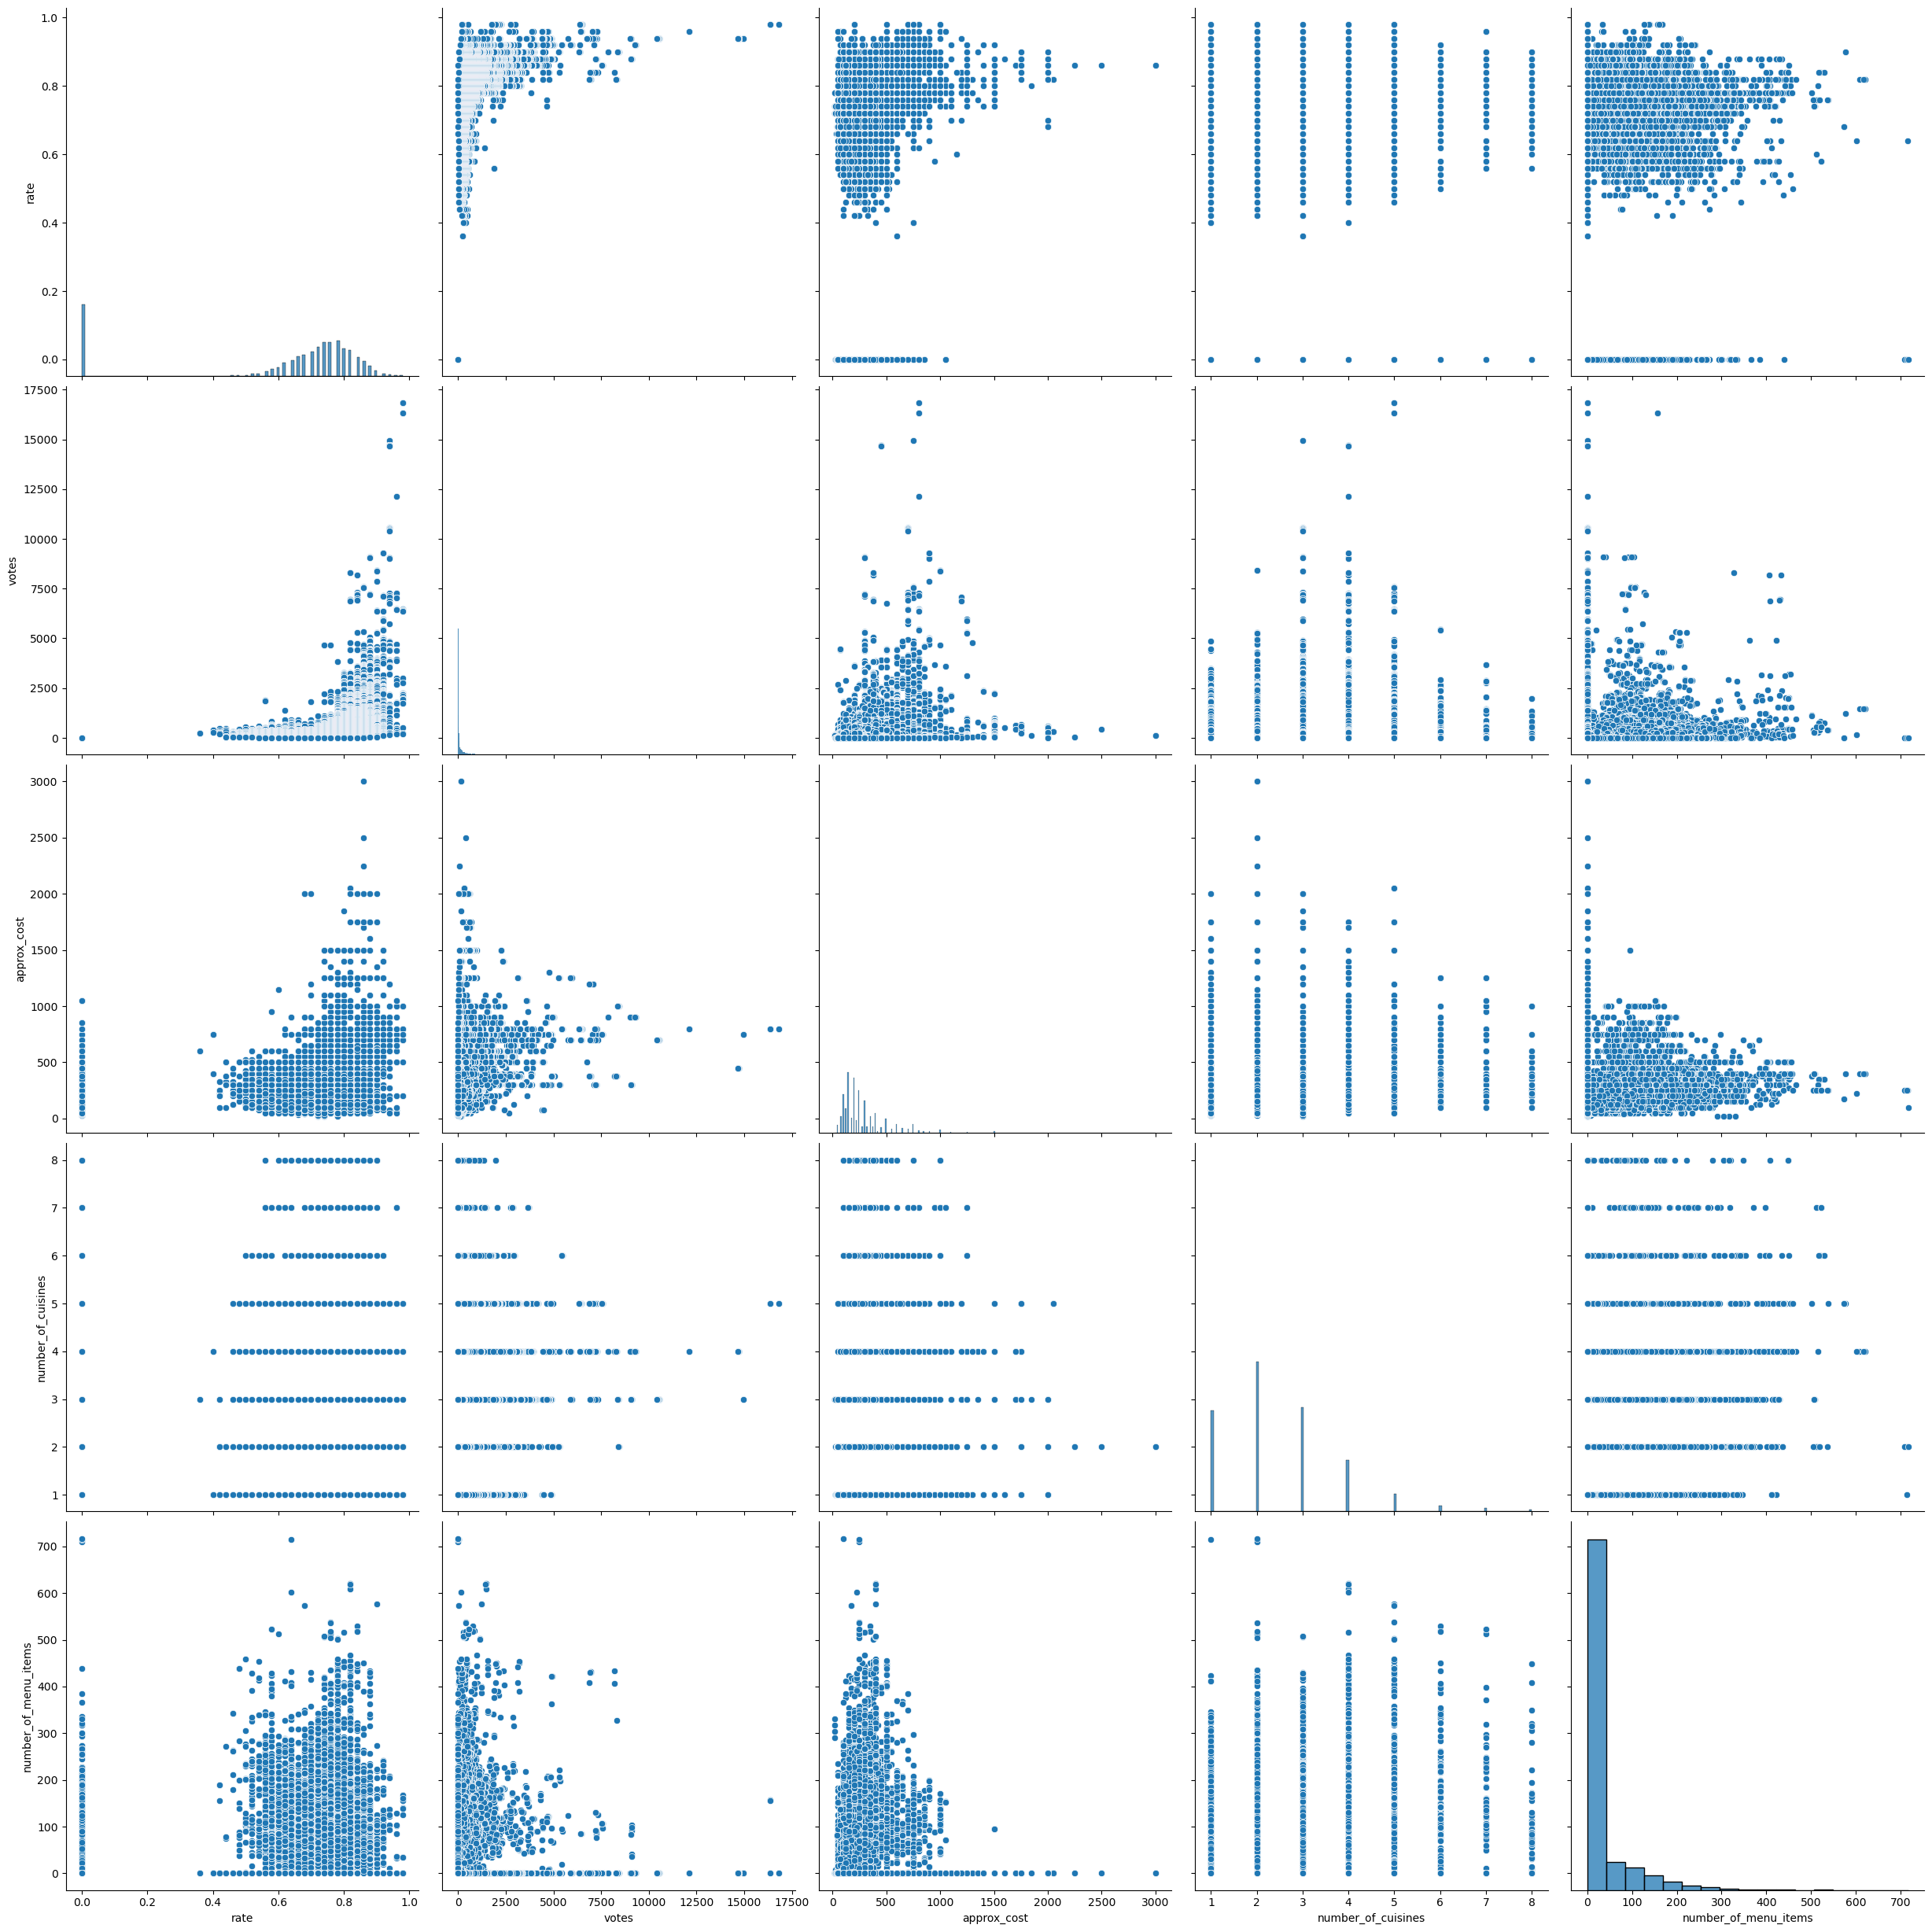

In [53]:
sns.pairplot(df_num, height=5)

plt.show()

* ### **Categorical qiymatlar uchun korrelatsiya**

In [54]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

for col1 in df_cat.columns:
    for col2 in df_cat.columns:
        if col1 != col2:
            print(f"Cramér's V between {col1} and {col2}: {cramers_v(df[col1], df[col2])}")

Cramér's V between online_order and book_table: 0.017726418279443688
Cramér's V between online_order and location: 0.22660614193529288
Cramér's V between online_order and rest_type: 0.2625308874370597
Cramér's V between online_order and type: 0.30127077065542357
Cramér's V between online_order and city: 0.14648239803015822
Cramér's V between book_table and online_order: 0.017726418279443688
Cramér's V between book_table and location: 0.30009765104698677
Cramér's V between book_table and rest_type: 0.6123362453555251
Cramér's V between book_table and type: 0.3583519436710606
Cramér's V between book_table and city: 0.1215248582659911
Cramér's V between location and online_order: 0.22660614193529288
Cramér's V between location and book_table: 0.30009765104698677
Cramér's V between location and rest_type: 0.14162355843610416
Cramér's V between location and type: 0.136549463557245
Cramér's V between location and city: 0.5678742860765172
Cramér's V between rest_type and online_order: 0.26253

# **Encoding**

Endi esa barcha categorical ustunlarimizni numerical ustunlarga aylantirishimiz kerak. Bu amalni `OrdinalEncoder` orqali bajaramiz

In [55]:
encoder = OrdinalEncoder()

encoded_df = encoder.fit_transform(df_cat)

df_cat_to_num = pd.DataFrame(encoded_df, columns=df_cat.columns)

Encodingdan so'ng bizda categorical ustunlar qolmaganini ko'rishimiz mumkin.

In [56]:
df_cat_to_num

,online_order,book_table,location,rest_type,type,city
0,1.0,1.0,76.0,65.0,2.0,28.0
1,1.0,1.0,76.0,65.0,4.0,28.0
2,1.0,1.0,76.0,65.0,5.0,28.0
3,1.0,1.0,76.0,65.0,2.0,4.0
4,1.0,1.0,76.0,65.0,4.0,4.0
...,...,...,...,...,...,...
48591,0.0,0.0,9.0,76.0,4.0,29.0
48592,0.0,0.0,9.0,76.0,4.0,29.0
48593,0.0,0.0,89.0,8.0,5.0,29.0
48594,0.0,0.0,89.0,8.0,6.0,29.0


Navbatdagi qadam esa biz yuqorida ajratib olgan, faqatgina raqamlardan tashkil topgan ma'lumotlar `df_num` va hozirgi encoding dan so'ng tayyor bo'lgan `df_cat_to_num` ma'lumotlarini birlashtirishdan iborat.

In [57]:
df = pd.concat([df_num, df_cat_to_num], axis=1)

Yashasin, endi bizda faqatgina raqamlardan iborat ma'lumotlar bor

In [58]:
df.head()

,rate,votes,approx_cost,number_of_cuisines,number_of_menu_items,online_order,book_table,location,rest_type,type,city
1,0.98,16832.0,800.0,5.0,0.0,1.0,1.0,76.0,65.0,4.0,28.0
2,0.98,16832.0,800.0,5.0,0.0,1.0,1.0,76.0,65.0,5.0,28.0
3,0.98,16832.0,800.0,5.0,0.0,1.0,1.0,76.0,65.0,2.0,4.0
4,0.98,16345.0,800.0,5.0,0.0,1.0,1.0,76.0,65.0,4.0,4.0
5,0.98,16345.0,800.0,5.0,157.0,1.0,1.0,76.0,65.0,5.0,4.0


## **Mixed Correlation**

In [59]:
df.corrwith(df['approx_cost']).sort_values(ascending=False)

approx_cost             1.000000
votes                   0.376577
book_table              0.329122
rate                    0.295518
number_of_cuisines      0.260442
online_order            0.063490
location                0.045979
type                    0.044807
city                    0.010944
number_of_menu_items    0.010357
rest_type              -0.138060
dtype: float64

# **Feature Scaling**

Bizda faqatgina raqamli qiymatlar qolgani uchun, barcha ustunlar haqida statistik ma'lumot olishimiz mumkin

In [60]:
df.describe()

,rate,votes,approx_cost,number_of_cuisines,number_of_menu_items,online_order,book_table,location,rest_type,type,city
count,48596.000000,48596.000000,48596.000000,48596.000000,48596.000000,48596.000000,48596.000000,48596.000000,48596.000000,48596.000000,48596.000000
mean,0.618785,295.531999,283.204122,2.478229,26.469030,0.612478,0.131410,36.146555,48.926126,2.794777,14.187382
std,0.286045,822.370833,222.384431,1.272211,61.718861,0.487189,0.337852,27.022624,27.086285,1.144182,8.263818
min,0.000000,0.000000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.620000,9.000000,150.000000,2.000000,0.000000,0.000000,0.000000,12.000000,26.000000,2.000000,7.000000
50%,0.720000,46.000000,200.000000,2.000000,0.000000,1.000000,0.000000,32.000000,38.000000,2.000000,15.000000
75%,0.780000,210.000000,350.000000,3.000000,0.000000,1.000000,0.000000,55.000000,76.000000,4.000000,20.000000
max,0.980000,16832.000000,3000.000000,8.000000,717.000000,1.000000,1.000000,92.000000,90.000000,6.000000,29.000000


Yuqoridagi jadvalda har bir ustundagi qiymatlar turlicha diapazonda ekanligini osongina ko'rish mumkin. Biz esa ularni `MinMaxScaler` yordamida bir xil diapazonga olib kelamiz

In [61]:
scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

In [62]:
df.head()

,rate,votes,approx_cost,number_of_cuisines,number_of_menu_items,online_order,book_table,location,rest_type,type,city
1,1.0,1.000000,0.261745,0.571429,0.000000,1.0,1.0,0.826087,0.722222,0.666667,0.965517
2,1.0,1.000000,0.261745,0.571429,0.000000,1.0,1.0,0.826087,0.722222,0.833333,0.965517
3,1.0,1.000000,0.261745,0.571429,0.000000,1.0,1.0,0.826087,0.722222,0.333333,0.137931
4,1.0,0.971067,0.261745,0.571429,0.000000,1.0,1.0,0.826087,0.722222,0.666667,0.137931
5,1.0,0.971067,0.261745,0.571429,0.218968,1.0,1.0,0.826087,0.722222,0.833333,0.137931


`Scaling` jarayonidan so'ng barcha qiymatlar `[0;1]` intervalda ekanligini ko'rishimiz mumkin.

In [63]:
df.describe()

,rate,votes,approx_cost,number_of_cuisines,number_of_menu_items,online_order,book_table,location,rest_type,type,city
count,48596.000000,48596.000000,48596.000000,48596.000000,48596.000000,48596.000000,48596.000000,48596.000000,48596.000000,48596.000000,48596.000000
mean,0.631413,0.017558,0.088324,0.211176,0.036916,0.612478,0.131410,0.392897,0.543624,0.465796,0.489220
std,0.291883,0.048858,0.074626,0.181744,0.086079,0.487189,0.337852,0.293724,0.300959,0.190697,0.284959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.632653,0.000535,0.043624,0.142857,0.000000,0.000000,0.000000,0.130435,0.288889,0.333333,0.241379
50%,0.734694,0.002733,0.060403,0.142857,0.000000,1.000000,0.000000,0.347826,0.422222,0.333333,0.517241
75%,0.795918,0.012476,0.110738,0.285714,0.000000,1.000000,0.000000,0.597826,0.844444,0.666667,0.689655
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Reducing memory usage**

In [64]:
df.dropna(inplace=True)

In [65]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 47251 entries, 1 to 48595
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rate                  47251 non-null  float64
 1   votes                 47251 non-null  float64
 2   approx_cost           47251 non-null  float64
 3   number_of_cuisines    47251 non-null  float64
 4   number_of_menu_items  47251 non-null  float64
 5   online_order          47251 non-null  float64
 6   book_table            47251 non-null  float64
 7   location              47251 non-null  float64
 8   rest_type             47251 non-null  float64
 9   type                  47251 non-null  float64
 10  city                  47251 non-null  float64
dtypes: float64(11)
memory usage: 4.3 MB


`df` obyekti ayni vaqtda `4.2 MB` xotirani band qilgan va undagi barcha qiymatlar `[0; 1]` intervalda. 

In [66]:
columns = df.columns

for column in columns:
    df[column] = df[column].astype(np.float16)

# **Training**

In [67]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :9]

y = df.iloc[:, 9]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)

# **Evaluation**